In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.metrics import mean_absolute_error


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [2]:
df=pd.read_csv('DataFrame3.csv')

In [3]:
df = df.drop('Unnamed: 0', 1)
df['date']= pd.to_datetime(df['date'])

In [4]:
df.head()

,date,NVDA open,AMD open,INTC open,ATVI open,EA open,Curde oil,Gold,Nasdaq index,ETH-USD open,BTC-USD open
0,2021-10-15,218.10,112.51,54.20,76.50,135.85,81.48,1794.5,14891.24,3790.15,57345.90
1,2021-10-14,212.88,110.50,52.90,75.94,136.72,80.59,1792.2,14717.50,3604.96,57372.83
2,2021-10-13,209.18,106.28,52.38,75.34,136.96,80.58,1760.8,14537.17,3492.75,56038.26
3,2021-10-12,208.28,105.17,53.57,76.45,139.53,80.50,1751.9,14539.09,3546.48,57526.83
4,2021-10-11,205.75,104.62,53.81,77.74,139.92,79.59,1756.6,14540.08,3419.73,54734.13


In [5]:
df.describe()

,NVDA open,AMD open,INTC open,ATVI open,EA open,Curde oil,Gold,Nasdaq index,ETH-USD open,BTC-USD open
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,86.738160,47.00201,52.556970,69.050190,117.550830,56.294180,1532.677750,9548.249830,745.449370,16030.514060
std,51.274356,30.69069,5.747759,16.017043,19.399381,12.747828,250.013535,2646.636424,919.966049,15376.209754
min,31.620000,9.08000,40.910000,40.340000,75.200000,-14.000000,1173.200000,6257.860000,85.380000,3253.120000
25%,49.142500,20.39250,47.795000,55.055000,98.970000,51.237500,1294.200000,7489.647500,187.815000,6949.365000
50%,62.495000,33.82000,51.900000,70.365000,117.920000,58.210000,1492.700000,8150.720000,312.005000,9296.880000
75%,129.732500,79.68500,56.865000,80.742500,135.942500,65.502500,1779.650000,11541.977500,762.500000,15356.112500
max,228.330000,116.63000,68.200000,103.820000,149.060000,81.480000,2045.500000,15375.980000,4174.640000,63523.750000


### Data spliting 
data was splitted train [2017/10---2021/1] and test [2021/1---2021/10] to check if the model can be applied on other data and is the model over fitting  

In [6]:

train=df.iloc[200:1000]
test=df.iloc[0:200]

In [7]:
train.corr()

,NVDA open,AMD open,INTC open,ATVI open,EA open,Curde oil,Gold,Nasdaq index,ETH-USD open,BTC-USD open
NVDA open,1.000000,0.849301,0.120423,0.791283,0.696324,-0.452891,0.815837,0.902989,0.240144,0.598683
AMD open,0.849301,1.000000,0.260158,0.440431,0.346371,-0.649767,0.923451,0.957312,-0.138260,0.526935
INTC open,0.120423,0.260158,1.000000,0.026053,0.148471,-0.274130,0.322110,0.269961,-0.289111,-0.123058
ATVI open,0.791283,0.440431,0.026053,1.000000,0.885912,-0.099630,0.446281,0.552587,0.494605,0.488342
EA open,0.696324,0.346371,0.148471,0.885912,1.000000,-0.015744,0.393231,0.496682,0.522006,0.391870
Curde oil,-0.452891,-0.649767,-0.274130,-0.099630,-0.015744,1.000000,-0.743811,-0.485538,0.265264,-0.199932
Gold,0.815837,0.923451,0.322110,0.446281,0.393231,-0.743811,1.000000,0.885446,-0.032977,0.545403
Nasdaq index,0.902989,0.957312,0.269961,0.552587,0.496682,-0.485538,0.885446,1.000000,0.011669,0.617055
ETH-USD open,0.240144,-0.138260,-0.289111,0.494605,0.522006,0.265264,-0.032977,0.011669,1.000000,0.540003
BTC-USD open,0.598683,0.526935,-0.123058,0.488342,0.391870,-0.199932,0.545403,0.617055,0.540003,1.000000


<AxesSubplot:>

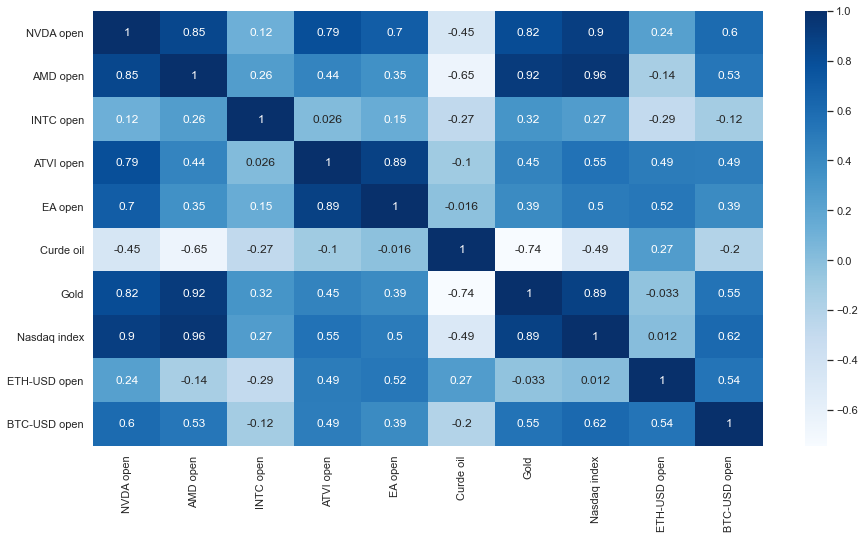

In [8]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(train.corr(),cmap="Blues",annot=True)
#sns.set(rc={'figure.figsize':(11.7,8.27)})

In [9]:
test

,date,NVDA open,AMD open,INTC open,ATVI open,EA open,Curde oil,Gold,Nasdaq index,ETH-USD open,BTC-USD open
0,2021-10-15,218.10,112.51,54.20,76.50,135.85,81.48,1794.5,14891.24,3790.15,57345.90
1,2021-10-14,212.88,110.50,52.90,75.94,136.72,80.59,1792.2,14717.50,3604.96,57372.83
2,2021-10-13,209.18,106.28,52.38,75.34,136.96,80.58,1760.8,14537.17,3492.75,56038.26
3,2021-10-12,208.28,105.17,53.57,76.45,139.53,80.50,1751.9,14539.09,3546.48,57526.83
4,2021-10-11,205.75,104.62,53.81,77.74,139.92,79.59,1756.6,14540.08,3419.73,54734.13
...,...,...,...,...,...,...,...,...,...,...,...
195,2021-01-07,129.68,91.33,51.49,88.86,137.33,50.53,1922.6,12867.34,1208.08,36833.88
196,2021-01-06,132.23,91.62,50.44,89.06,138.52,49.82,1952.0,12666.15,1101.01,34013.61
197,2021-01-05,131.00,92.10,49.45,90.32,140.23,47.38,1941.7,12665.65,1041.50,31977.04
198,2021-01-04,131.04,92.11,49.89,92.70,143.44,48.40,1912.2,12958.52,977.06,32810.95


# Model 1 
Y = NVDA stock price 
X = all the other features


In [10]:
X = train.iloc[:,3:12]
Y = train['NVDA open']
X_test= test.iloc[:,3:12]
Y_test = test['NVDA open']


lm = LinearRegression() 
lm.fit(X,Y)


LinearRegression()

In [11]:
preds_test = lm.predict(X_test) # generate predictions (on training data) using fit model
preds = lm.predict(X)
mean_absolute_error(Y_test, preds_test)

23.646497610990163

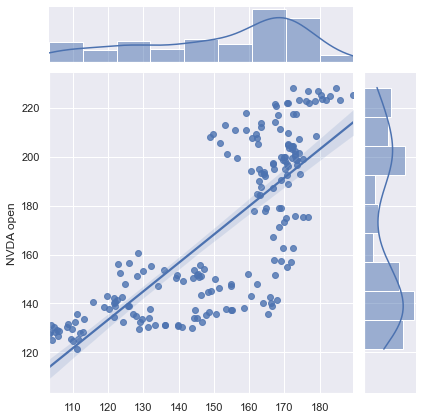

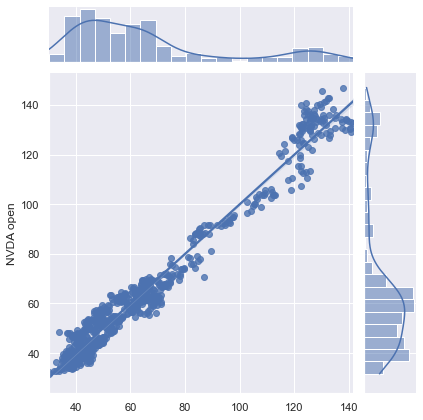

In [12]:


sns.jointplot(x=preds_test,y=Y_test, kind='reg')

sns.jointplot(x=preds,y=Y, kind='reg')
#mean_absolute_error(Y_test, preds_test)

### Model 1 conclusion 
MAE=23.65
from the graph it can be seen that the the model is performing signactnily better on the train data . expected results since the model is using 10 difrrent variables, in the next model we will use only variable with high corraltion and we will avoid multicollinearity and check how is the performence  

# Model 2 
Y=NVDA stock price 
X=AMD open,ATVI open,Gold,Nasdaq index

In [13]:

X2=train.loc[:,['AMD open','ATVI open','Gold','Nasdaq index',]]
X2_test=test.loc[:,['AMD open','ATVI open','Gold','Nasdaq index',]]
lm2 = LinearRegression() 
lm2.fit(X2,Y)
preds_test2 = lm2.predict(X2_test) # generate predictions (on training data) using fit model

preds2 = lm2.predict(X2)
mean_absolute_error(Y_test, preds_test2)

29.251273366730615

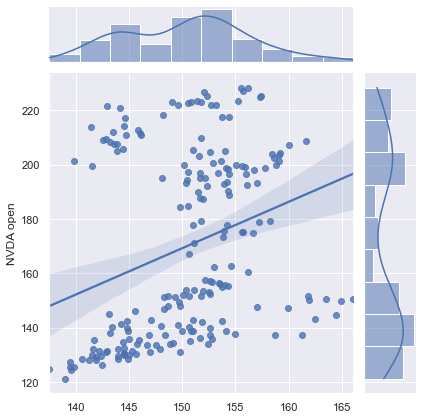

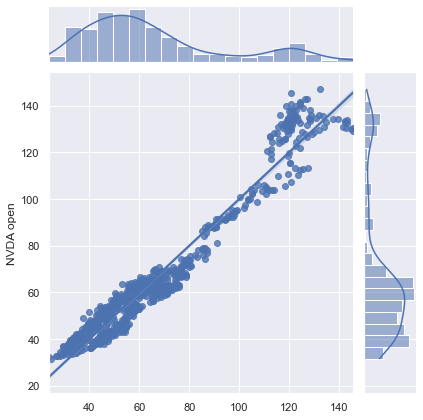

In [14]:

sns.jointplot(x=preds_test2,y=Y_test, kind='reg')
sns.jointplot(x=preds2,y=Y, kind='reg')


### Model2  conclusion 
MAE=29.25
well this is unexpected shouldnt this model perform better than model 1 since we used corralted varibles ?
after looking at the train and test data we relized some varriable corraltion have changed 
for example ATVI had postive corralation in train set then in the test set was negtivlely corralted 

for the next model we will use more stable variables perform the same all the time which is NASDAQ compsite index and check the performence 

# Model 3 
Y= NVDA stop price 
X= Nasdaq compsite index 

In [15]:

X4=train.loc[:,['Nasdaq index']]
X4_test=test.loc[:,['Nasdaq index']]
lm4 = LinearRegression() 
lm4.fit(X4,Y)

LinearRegression()

In [16]:
preds_test4 = lm4.predict(X4_test) # generate predictions (on training data) using fit model

preds4 = lm4.predict(X4)
mean_absolute_error(Y_test, preds_test4)

20.776868079087762

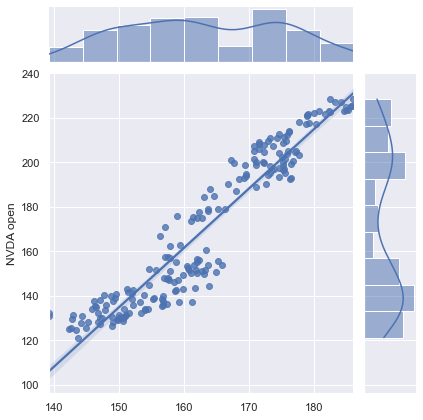

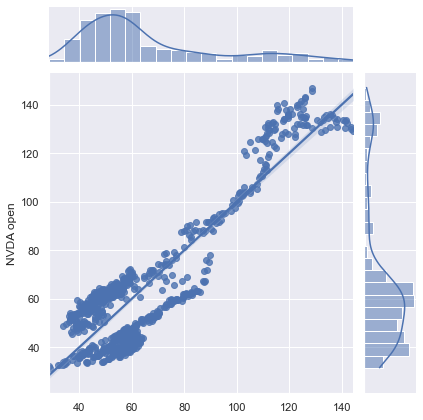

In [17]:


sns.jointplot(x=preds_test4,y=Y_test, kind='reg')
sns.jointplot(x=preds4,y=Y, kind='reg')

### Model3  conclusion 
MAE=20.78
the model is performing better in the test set :) ,  but all these models predecting the stock price today
what if we want to forecast the stock price tomorrow ? in the next model we are attemping on forcasting tomorrow stock value 

In [18]:
y_shifted=train['NVDA open'].shift(1)

In [19]:
y_shifted

200       NaN
201    129.90
202    129.25
203    130.63
204    130.37
        ...  
995     51.50
996     52.34
997     51.28
998     50.47
999     49.45
Name: NVDA open, Length: 800, dtype: float64

In [20]:
train['NVDA shifted']=y_shifted

<ipython-input-20-7a6dab896ce1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['NVDA shifted']=y_shifted


In [21]:
train.dropna()

,date,NVDA open,AMD open,INTC open,ATVI open,EA open,Curde oil,Gold,Nasdaq index,ETH-USD open,BTC-USD open,NVDA shifted
201,2020-12-29,129.25,91.66,47.22,91.63,141.00,47.72,1881.30,12965.39,730.36,27081.81,129.90
202,2020-12-28,130.63,92.93,47.19,91.76,142.33,48.23,1895.50,12914.64,683.21,26280.82,129.25
203,2020-12-24,130.37,91.80,46.60,90.30,141.32,47.51,1881.25,12791.54,584.14,23240.20,130.63
204,2020-12-23,132.56,93.08,46.17,89.95,139.52,46.79,1867.00,12834.94,634.82,23781.97,130.37
205,2020-12-22,133.19,93.36,46.25,89.44,141.24,47.93,1882.20,12785.22,609.42,22794.04,132.56
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2017-11-01,52.34,11.25,45.97,65.69,116.00,54.65,1272.20,6758.64,305.76,6440.97,51.50
996,2017-10-31,51.28,10.76,45.20,65.34,118.13,54.08,1273.10,6713.71,307.38,6132.02,52.34
997,2017-10-30,50.47,11.26,44.48,64.33,117.13,54.16,1270.00,6693.77,304.78,6114.85,51.28
998,2017-10-27,49.45,12.17,43.30,62.36,116.83,52.80,1268.40,6635.03,296.51,5899.74,50.47


In [22]:
#checking for corralrtion with Y and lagged Y lag = 1 seems promsing 

y_shifted
for i in range(1,16):
    print(i, df['NVDA open'].autocorr(lag=i))

1 0.9987156271757427
2 0.9974850599209892
3 0.9963368640024611
4 0.9952521169138118
5 0.9942374806450078
6 0.9933568018098278
7 0.9922606577401879
8 0.9910088584104878
9 0.989944904248535
10 0.9887631398793009
11 0.9876496359212491
12 0.9866281070357272
13 0.985520764953514
14 0.9844895420257519
15 0.983683799008483


In [23]:
##model4 nasdaq index ,shifted NVDA open 
df['NVDA yest']=df['NVDA open'].shift(-1)
Mod5=df.sort_values('date').reset_index().loc[:,['date','NVDA open','Nasdaq index','NVDA yest']].dropna()

In [24]:
Mod5['Nasdaq index yest']=Mod5['Nasdaq index'].shift(-1)
Mod5.dropna(inplace=True)

In [25]:
train5=Mod5.iloc[0:800]
test5=Mod5.iloc[800:1000]

In [26]:
Mod5

,date,NVDA open,Nasdaq index,NVDA yest,Nasdaq index yest
1,2017-10-27,49.45,6635.03,48.69,6693.77
2,2017-10-30,50.47,6693.77,49.45,6713.71
3,2017-10-31,51.28,6713.71,50.47,6758.64
4,2017-11-01,52.34,6758.64,51.28,6709.39
5,2017-11-02,51.50,6709.39,52.34,6737.09
...,...,...,...,...,...
994,2021-10-08,211.01,14694.72,210.92,14540.08
995,2021-10-11,205.75,14540.08,211.01,14539.09
996,2021-10-12,208.28,14539.09,205.75,14537.17
997,2021-10-13,209.18,14537.17,208.28,14717.50


In [27]:
Mod5.corr()

,NVDA open,Nasdaq index,NVDA yest,Nasdaq index yest
NVDA open,1.000000,0.956859,0.998712,0.955893
Nasdaq index,0.956859,1.000000,0.955744,0.998782
NVDA yest,0.998712,0.955744,1.000000,0.954799
Nasdaq index yest,0.955893,0.998782,0.954799,1.000000


# Model 4
Y=NVDA price (tomorrow)

X=NASDAQ index (today) , NVDA price (today)

In [28]:
lm5 = LinearRegression() 
lm5.fit(train5[['NVDA yest','Nasdaq index yest']],train5['NVDA open'])
preds_test5=lm5.predict(test5[['NVDA yest','Nasdaq index yest']])


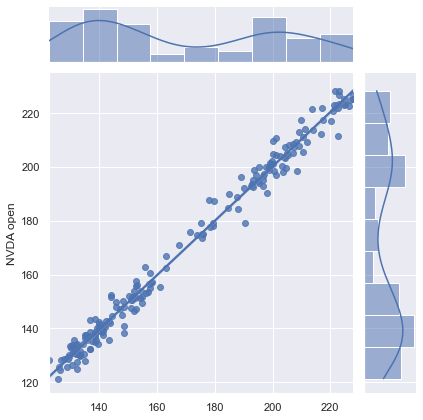

In [29]:
sns.jointplot(x=preds_test5,y=test5['NVDA open'], kind='reg')

In [30]:
mean_absolute_error(test5['NVDA open'], preds_test5)

2.7440008662215902

In [31]:
lm.coef_
pd.DataFrame(index=['NVDA yest','Nasdaq index yest'], data= lm5.coef_)

,0
NVDA yest,0.976011
Nasdaq index yest,0.000507


In [32]:
lm5.intercept_

-2.5924601165939407

In [33]:

oc=[[223.05, 15160]]
lm5.predict(oc)

## cheking on real time values y in real life = 220.97
## the model suggestion price 222.79 

array([222.7916761])